In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#LinearRegression, Ridge ve Lasso gibi siniflari iceren regresyon modellerini ekledim.
#bu modelleri farkli regyesyon turlerini uygulamak icin kullanicam.

#ihtiyacim olan tum kutuphaneleri import ettim.

## from sklearn.model_selection import train_test_split

verileri rastgele 2 alt kume arasinda bolup - makine ogrenimi modelimi egitmek ve test etmek icin:
train_test_split: islevi veri kumesini egitim ve test alt kumelerine bolmek icin kullaniyorum.

ilk once train test split ile modelleme yapicam

## from sklearn.metrics import mean_squared_error, r2_score

'sklearn.metrics' modulunden 'mean_squared_error', 'r2_score': islevleri regresyon modellerimin performansini degerlendirmek icin kullanicam.

Bu metrikleri kullanarak regresyon modelimin tahmin performansini degerlendirecegim

In [89]:
df = pd.read_excel("cars.xls")
#veriyi okuyorum

In [9]:
!pip install pandas-profiling

In [10]:
import pandas as pd
import numpy as np
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
pip install xlrd

In [12]:
profile=df.profile_report(title='Profiling Report', plot={'histogram': {'bins': 100}})
profile.to_file('report.html')    #bins'i 100 yaparsak raporun 100de 100 unu gosteriyoruz

#Profile report ile aldgim dokumani profile degiskenine atayip uzerinde calisabilmek icin
#bulundugum dizine html olarak kaydediyorum.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA- Exploratory Data Analysis


In [13]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [14]:
df.sample(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
282,13540.041642,17343,Chevrolet,Classic,Sedan 4D,Sedan,4,2.2,4,0,1,1
748,14881.955446,14376,Saturn,Ion,Quad Coupe 2D,Coupe,4,2.2,2,0,0,0
25,21460.013953,19467,Buick,Lacrosse,CXL Sedan 4D,Sedan,6,3.6,4,1,0,1
681,32053.097161,5144,SAAB,9_3 HO,Arc Sedan 4D,Sedan,4,2.0,4,1,1,0
622,16379.098701,8754,Pontiac,Vibe,Sportwagon 4D,Wagon,4,1.8,4,0,1,0


In [15]:
df['Make'].unique()
#Kac farki marka var ona bakiyorum isimleriyle

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [16]:
df['Make'].nunique()
#kac farkli marka oldugunu sayi olarak bakiyorum

6

In [17]:
df.shape   #satir sutun kontrol ediyorum

(804, 12)

In [18]:
df[df['Price']>60000]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1


In [19]:
df.describe()   #sayisal verilerin ayrintilarini inceliyorum

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


<Axes: >

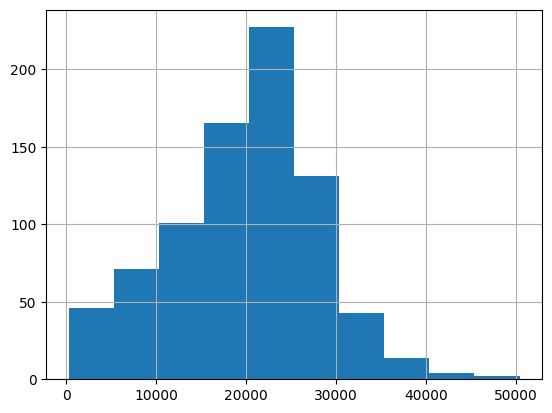

In [20]:
df['Mileage'].hist()  #mil kolonunun histogramini ciziyorum

<Axes: >

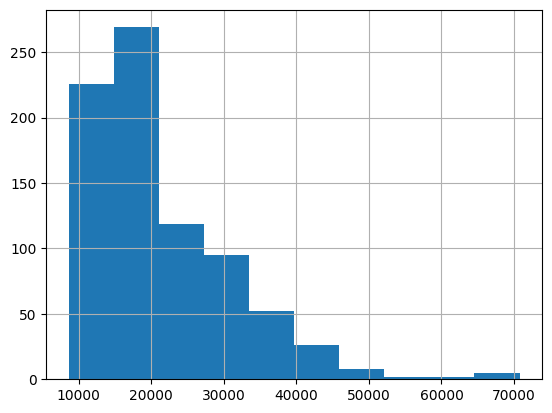

In [21]:
df['Price'].hist()   #price kolonunun histogramini ciziyorum

In [22]:
df.info()  #data türlerine ve verinin büyüküğüne bakıyorum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [23]:
df.isnull().sum()
#veri setimide hiç boş yok

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [24]:
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [25]:
abs(df.corr()['Price']).sort_values(ascending=False)
#fiyata gore korelasyonlara bakiyorum cunku fiyat tahmini yapicam,
#fiyat kolonuna gore diger kolonlarin korelasyonlarini aliyorum
#abs ise mutlak deger olarak almamizi sagladi
#ascending=False ile buyukten kucuge siralama yaptirdim.True deseydik kucukten buyuge gosterecektir

<ipython-input-25-8627c3275db9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['Price']).sort_values(ascending=False)


Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

<ipython-input-26-07674f5ac61a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

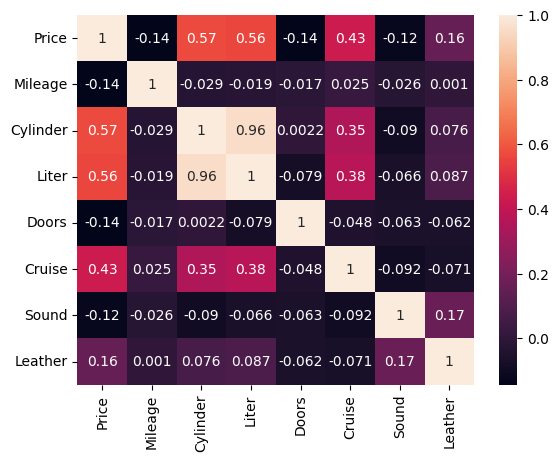

In [26]:
sns.heatmap(df.corr(),annot=True)

#burada silindirve litrenin birbirlerine yuzde 96 oraninda iliskili oldugunu goruyoruz.

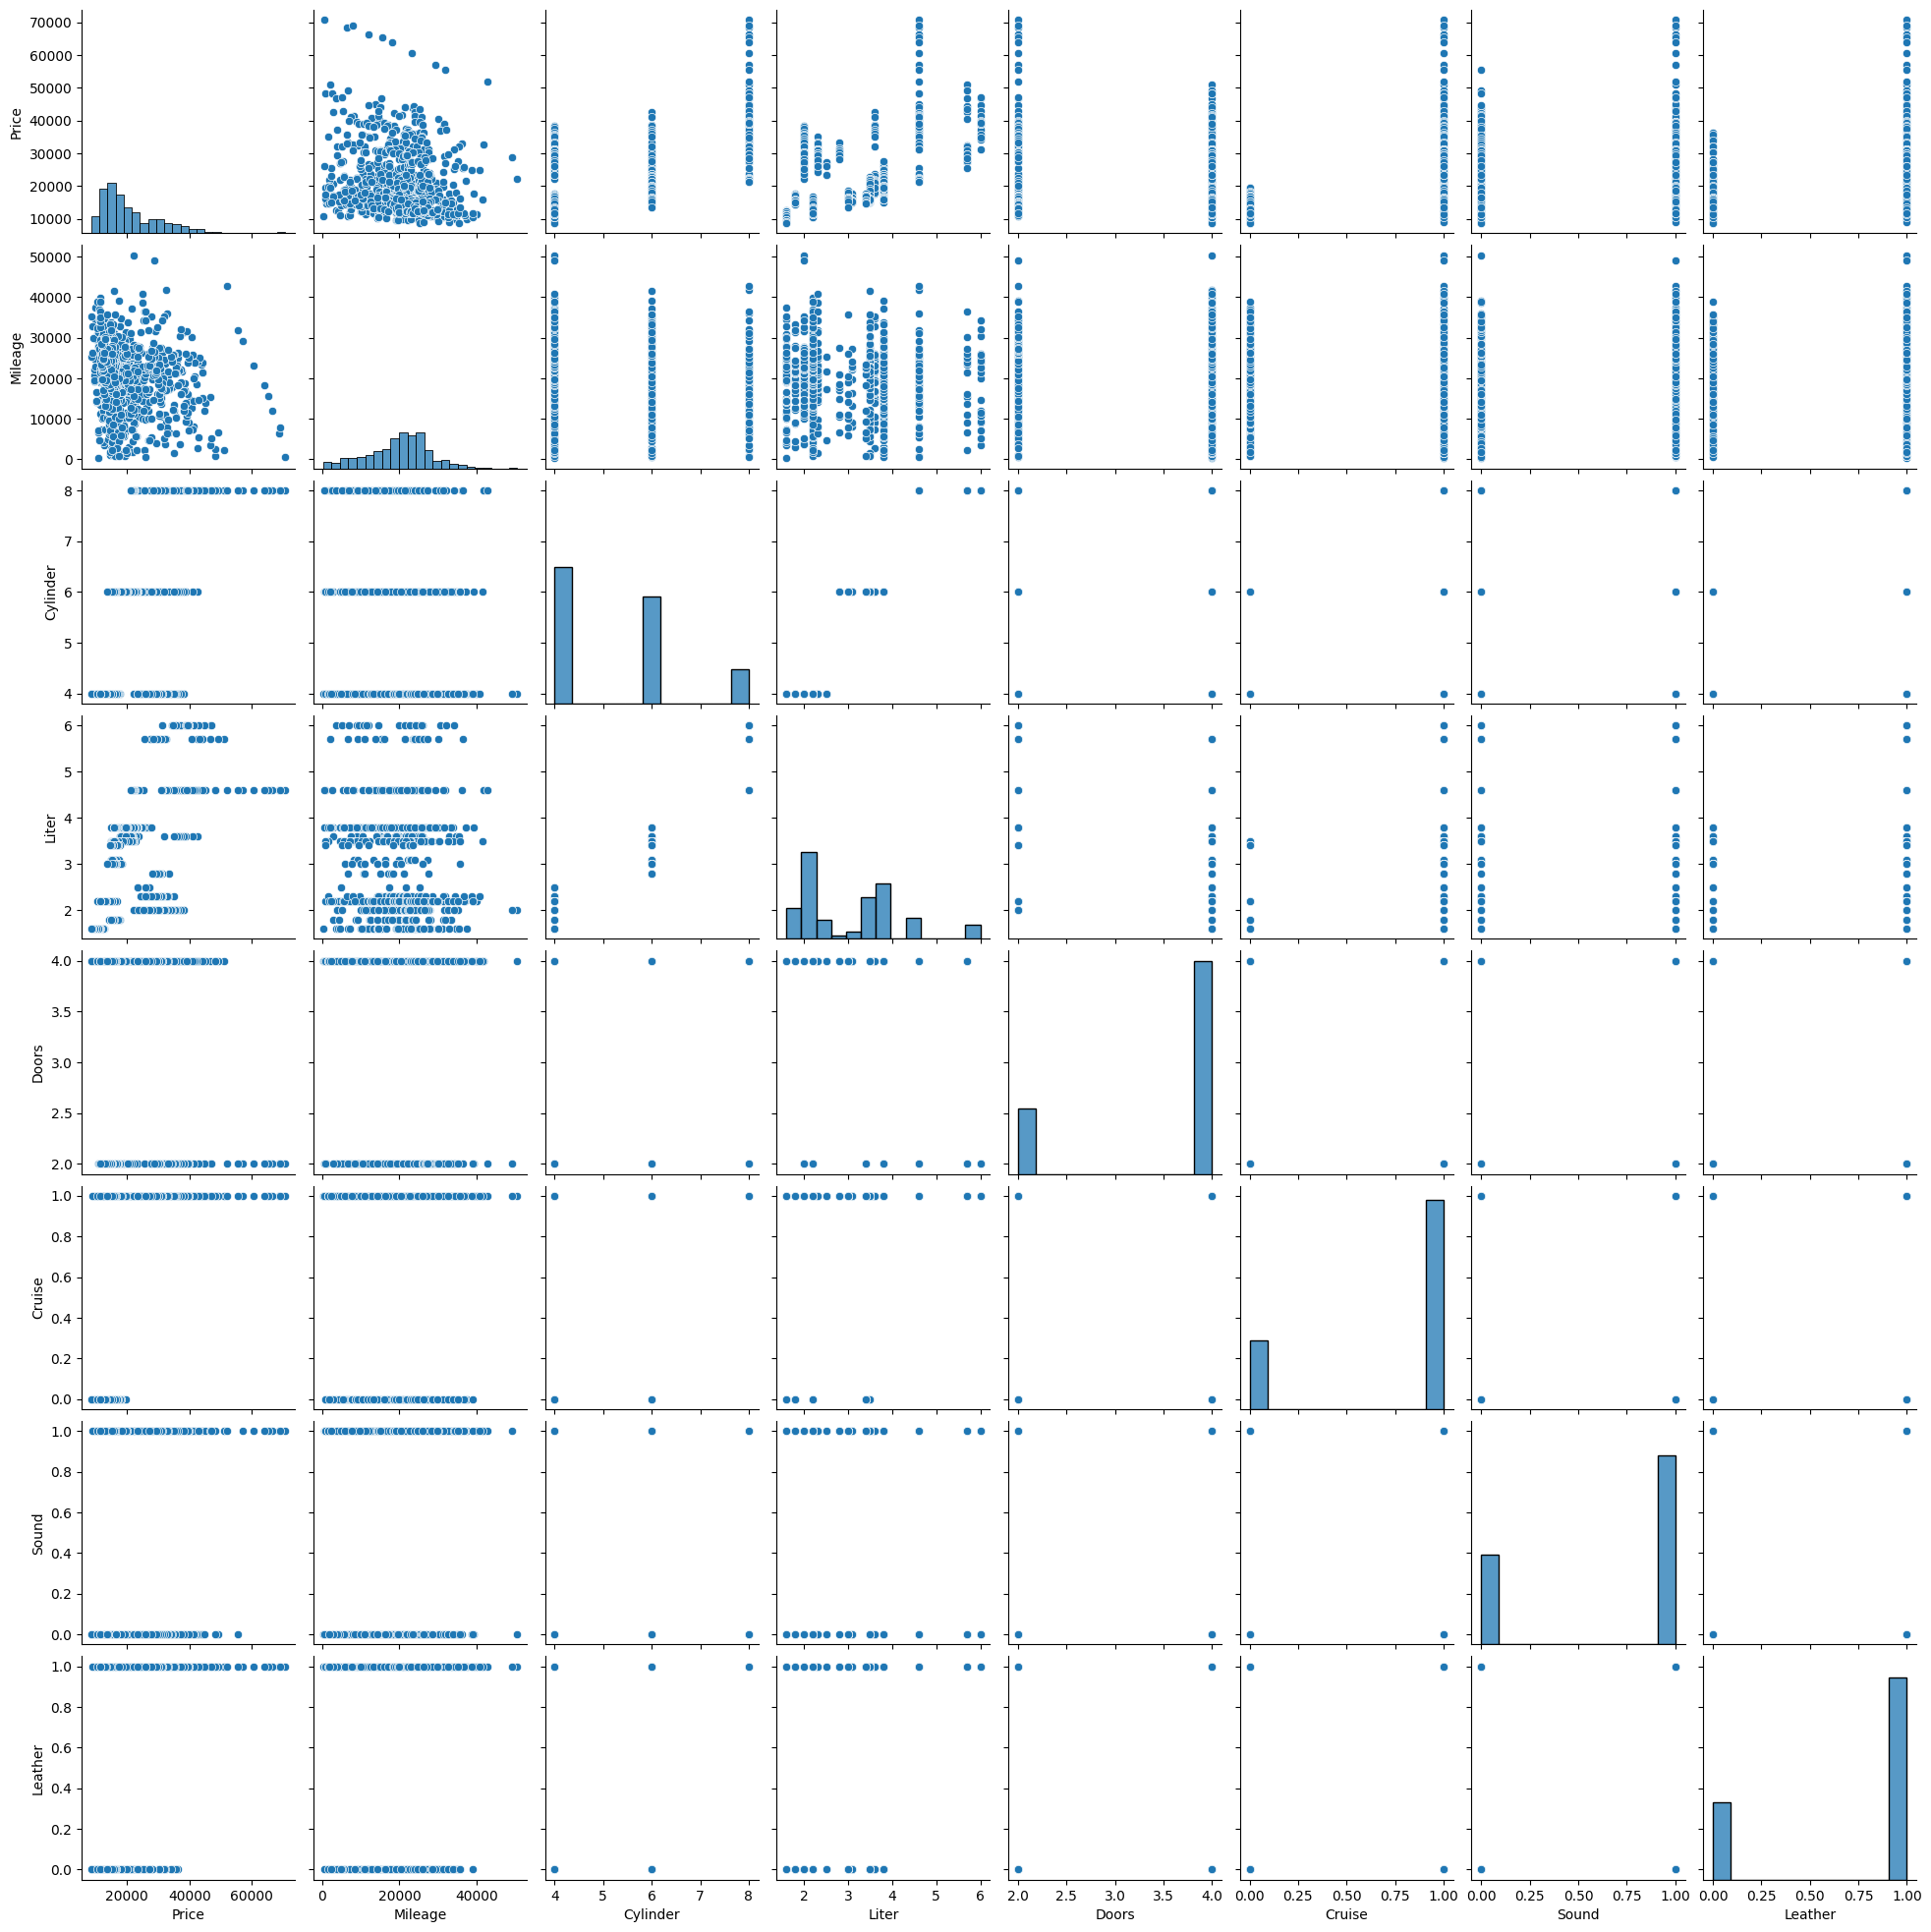

In [27]:
sns.pairplot(df)
#veri kesfi ve degiskenler arasindaki iliskileri anlamak icin kullaniyorum

# Ridge ile Feature enginering yapmadan tahmin yapiyoruz

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
df = pd.read_excel("cars.xls")

In [160]:
x = df[["Mileage","Cylinder","Liter","Cruise"]]

In [161]:
y = df[["Price"]]

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [163]:
R=Ridge()

In [164]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

# Tahmin sonuclarimizin degerleri assagidaki gibi r2 scor ve mean squared degerleri.

In [165]:
(mean_squared_error(tahmin2,y_test))**.5

7406.736714455521

# mean squared degerimiz 7400 gibi cok kotu bir sonuc verdi

In [166]:
r2_score(tahmin2,y_test)

-0.3710485668577228

# r2 skorumuz ise -0.37 geldi, feature engineering, hiperparametre ayarlamasi ve KFold ayarlamalarini yapmadan yaptigimiz tahmin baya kotu duruyor. simdi bu dediklerimi, istediginiz dogrultuyda yapip tahminlemelerime gecicem

## Once datasetimin ustunde oynama yapmadan model egitimi yapiyorum sadece

### Lofo da yapmadim

In [28]:
x = df

In [29]:
x

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [30]:
x = pd.get_dummies(x,drop_first=True)

#biliyorum ki datasetimin icinde string degerler de var bu sekilde modeli egitemem, bu yuzden one hot code encoding yapiyorum

In [31]:
x = x.drop('Price', axis=1)

In [32]:
x.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,Make_Pontiac,...,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,8221,6,3.1,4,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,9135,6,3.1,4,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,13196,6,3.1,4,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,16342,6,3.1,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,19832,6,3.1,4,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
y = df[["Price"]]  #tahmin edecegim hedef kolonumu y olarak adlandiriyorum

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#train test split ve linearregression paketlerini import ediyorum

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

#test size imi %20 random state parametremi 42 olarak ayarladim

In [36]:
x_train.shape, x_test.shape

((643, 93), (161, 93))

In [37]:
x_train

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,Make_Pontiac,...,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
344,20000,8,6.0,2,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
350,7054,8,6.0,2,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
443,15903,6,3.5,4,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
331,6709,4,2.2,4,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
290,13776,4,2.2,2,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,9795,6,3.8,4,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
106,24415,8,4.6,4,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
270,4922,4,2.2,4,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
435,18721,6,3.5,4,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
y_train

,Price
344,41371.379273
350,39875.854255
443,17162.478255
331,14696.028990
290,14023.938547
...,...
71,26060.335350
106,35866.582709
270,14061.122765
435,17173.942322


## Makina Ogrenmesine Geciyoruz

In [39]:
lr = LinearRegression()

#lr LinearRegression'i temsil ediyor bruada -  bi degisken olarak atiyoruz.

### Fit and Predict islemlerini yapiyorum

In [41]:
x

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,Make_Pontiac,...,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,8221,6,3.1,4,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,9135,6,3.1,4,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,13196,6,3.1,4,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,16342,6,3.1,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,19832,6,3.1,4,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,19095,6,3.0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,20484,6,3.0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,25979,6,3.0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
model = lr.fit(x_train,y_train)
#makine ogrenmesini yapiyorum

In [43]:
tahmin = model.predict(x_test)
#simdi tahmin ettiriyorum.

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

#ne kadar dogru tahmin ettigimizi anlamak icin mean_squared ve r2 score larima bakicam

In [45]:
(mean_squared_error(tahmin,y_test))**.5

#(mean_squared_error(tahmin,y_test)): MSE - mean square error
# **.5 : root mean square error : RMSE (0.5) - karekoku

#tahmin => tahmin ettigimiz degerdi
#bu komutla hatamizi hesapladik
#araba basina 825 dolar gibi bir hata payi var guzel gozukuyor

825.6829398684445

In [46]:
r2_score(y_test, tahmin)

#ama r2 score um %99 dan fazla cikti, bu durum asiri ogrenme ihtimalini getiriyor, bu yuzden hic iyi bir model olmadi bu.

0.9914044828589037

# Lofo ile baglantilara bakiyoruz

# Corr ile de bakicam
##### abs(df.corr()['Price']).sort_values(ascending=False)  

In [ ]:
! pip install lofo-importance

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
from lofo import Dataset

In [80]:
from lofo import LOFOImportance

In [102]:
from lofo import plot_importance

In [109]:
from sklearn.preprocessing import LabelEncoder

In [91]:
df = pd.DataFrame(df)

In [92]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [95]:
df_encoded = pd.get_dummies(df)

In [98]:
dataset = Dataset(df=df_encoded, target='Price', features=[col for col in df_encoded.columns if col != 'Price'])

In [99]:
model = DecisionTreeRegressor()

In [100]:
lofo_imp = LOFOImportance(dataset, model=model, scoring='neg_mean_squared_error')
importance_df = lofo_imp.get_importance()

  0%|          | 0/97 [00:00<?, ?it/s]

# One hot encoing yaptiktan sonra LOFO ile grafik cizdirip baglantilara bakiyorum

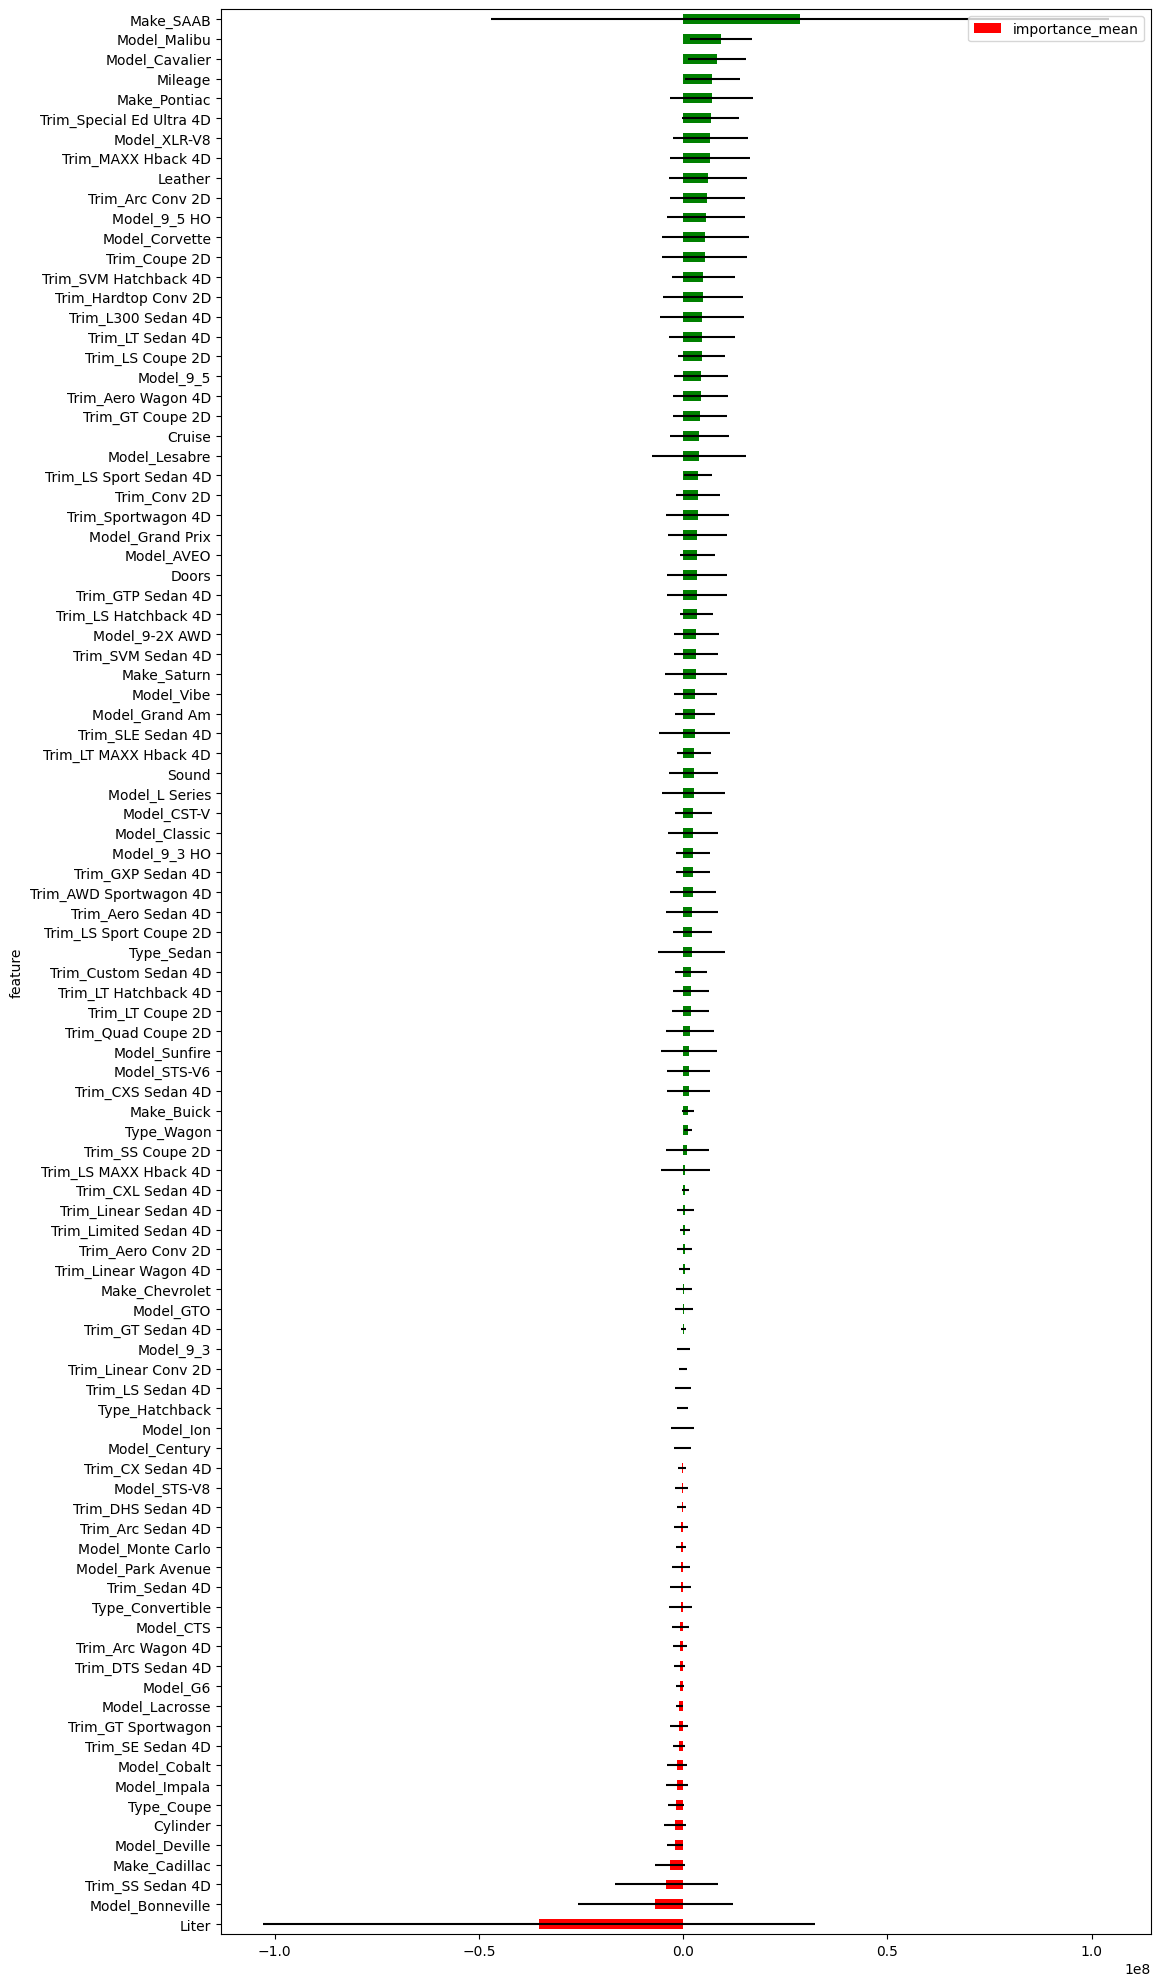

In [106]:
plot_importance(importance_df, figsize=(12, 25))

In [107]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [112]:
label_encoder = LabelEncoder()

In [113]:
columns_to_encode = ['Make', 'Model', 'Trim', 'Type']
df[columns_to_encode] = df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

In [114]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,44,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,21,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,21,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,21,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,21,3,6,3.0,4,1,1,0


In [118]:
dataset = Dataset(df=df, target='Price', features=[col for col in df.columns if col != 'Price'])

In [119]:
lofo_imp = LOFOImportance(dataset, model=model, scoring='neg_mean_squared_error')
importance_df = lofo_imp.get_importance()

  0%|          | 0/11 [00:00<?, ?it/s]

# Label-Encoding yapip LOFO ile grafigime bakiyorum

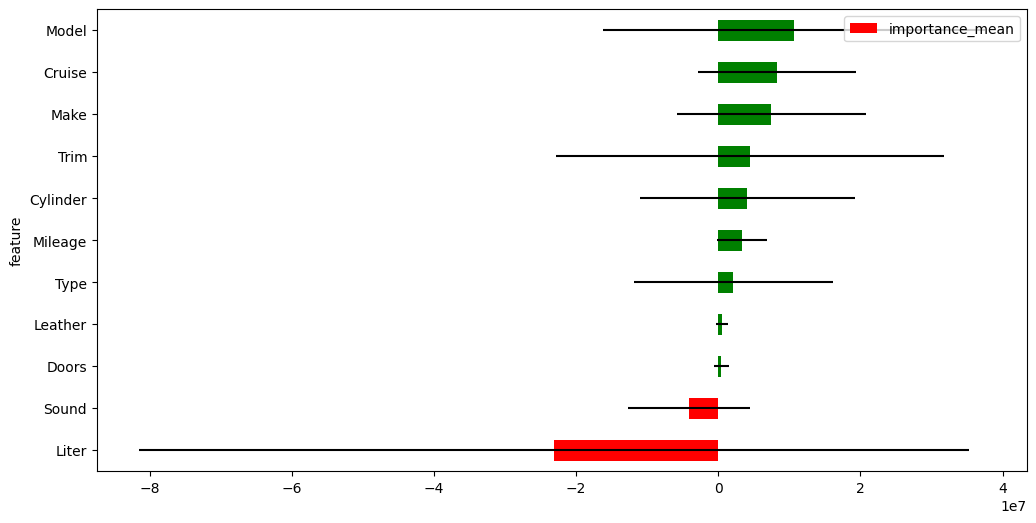

In [121]:
plot_importance(importance_df, figsize=(12, 6))

# Burada ise Price Kolonuna gore diger kolonlarin korelasyon degerlerine bakiyorum, hangi kolonun price kolonuna etkisi daha fazla diye inceliyorum. Mileage Make Model degerlerim az gorunuyor ama hem LOFO da hem de tecrubelerimden bunlarin onemli kolonlar olduklarini biliyorum. o yuzden tahminimde bunlari kullanmaya devam edicem

In [123]:
abs(df.corr()['Price']).sort_values(ascending=False)

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Trim        0.203280
Type        0.163871
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Make        0.131644
Sound       0.124348
Model       0.026599
Name: Price, dtype: float64

# GridSearch Ile en iyi parametreleri bulup egitip tahmin yapiyoruz

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

RandomForestRegressor(max_depth=20, n_estimators=200)

In [125]:
#RandomForestRegressor
#RandomForestRegressor(max_depth=20, n_estimators=200)
#en iyi hiperparametre sonuclarini yazdirdik.

In [140]:
y_test_pred = best_model.predict(x_test)

# R2 skoru hesaplama
r2 = r2_score(y_test, y_test_pred)
r2

0.9873009973417087

In [141]:
(mean_squared_error(y_test, predictions))**.5

1004.7945472464005

# En iyi Hiperparametreleri GridSearchCV kullanarak bulduk ve en iyi parametrelerle modelimizi egittik.

# Ve En iyi hiperparametre olarak bu sonuclari aldik:

####RandomForestRegressor
####RandomForestRegressor(max_depth=20, n_estimators=200)

In [142]:
#GridSearchCV ile yaptigimiz tahmin sonuclarimiz ise
#r2 : 0.9873009973417087
#(mean_squared_error(y_test, predictions))**.5: 1004.7945472464005
#seklinde oldu

# Optuna Ile hiperparametre bulma

In [127]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.7 MB/s eta 0:00:00


In [128]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split
    )

    score = -cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)


best_params = study.best_params
best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split']
)

best_model.fit(x_train, y_train)


[I 2023-09-28 19:37:37,093] A new study created in memory with name: no-name-de94ada1-1835-492f-a00d-b412b96c90a6
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10

RandomForestRegressor(max_depth=18, n_estimators=97)

# Optuna ile buldugumuz en iyi hiperparametrelerle modelimizi egittik.

# Optuna ile buldugumuz en iyi hiperparametre sonuclarimiz,
#### RandomForestRegressor
#### RandomForestRegressor(max_depth=18, n_estimators=97)

In [129]:
#RandomForestRegressor
#RandomForestRegressor(max_depth=18, n_estimators=97)
#Optuna ile buldugumuz en iyi parametrelerimiz.

In [130]:
# X_test: Test veri kümesi
predictions = best_model.predict(x_test)


#Optuna ile elde ettigimiz hiperparametre verileriyle egittigimiz modelimizin basari oranlari:

## r2 basari oranim
###r2:   0.9872708346720784

## tahminlerdeki fiyat farki
###(mean_squared_error(y_test, predictions))**.5:  1004.7945472464005

In [131]:
r2 = r2_score(y_test, predictions)

In [132]:
r2

0.9872708346720784

In [138]:
(mean_squared_error(y_test, predictions))**.5

1004.7945472464005

#K-Fold Cross Validation kullandim cunku regresyon tahminlerinden en basarili olan KFold modeli bu.

#KFold ile Optuna kütüphanesini kullanarak RandomForestRegressor modeli için en iyi hiperparametre setini belirliyoruz.
#En iyi hiperparametreleri kullanarak bir RandomForestRegressor modeli oluşturuyoruz (best_model).
#K-Fold Cross Validation kullanarak veriyi 5 parçaya bölüp her bir parça için modeli eğitiyor ve test ediyoruz.

In [143]:
import optuna
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
    }

    model = RandomForestRegressor(**params)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_list = []

    for train_index, test_index in kf.split(x_train):
        x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(x_train_fold, y_train_fold)
        y_test_pred = model.predict(x_test_fold)

        mse = mean_squared_error(y_test_fold, y_test_pred)
        mse_list.append(mse)

    return np.mean(mse_list)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_model = RandomForestRegressor(**best_params)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(x_train):
    x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_model.fit(x_train_fold, y_train_fold)
    y_pred = best_model.predict(x_test_fold)

    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = np.sqrt(mse)

    print("Fold MSE:", mse)
    print("Fold RMSE:", rmse)


[I 2023-09-28 20:41:28,791] A new study created in memory with name: no-name-81d94e19-00d3-41d7-93f0-2114fe636d5b
<ipython-input-143-de576669ff84>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_fold, y_train_fold)
<ipython-input-143-de576669ff84>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_fold, y_train_fold)
<ipython-input-143-de576669ff84>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_fold, y_train_fold)
<ipython-input-143-de576669ff84>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()

Fold MSE: 1179034.411643558
Fold RMSE: 1085.8335100942309


<ipython-input-143-de576669ff84>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train_fold, y_train_fold)


Fold MSE: 2101050.951758381
Fold RMSE: 1449.5002420691005


<ipython-input-143-de576669ff84>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train_fold, y_train_fold)


Fold MSE: 898704.8418745196
Fold RMSE: 948.0004440265413


<ipython-input-143-de576669ff84>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train_fold, y_train_fold)


Fold MSE: 731965.9297987672
Fold RMSE: 855.5500743958632


<ipython-input-143-de576669ff84>:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train_fold, y_train_fold)


Fold MSE: 1385278.7438405482
Fold RMSE: 1176.9786505457728


# En iyi degerim 855 dolar fiyat farki cikti, iyi bir deger

# Optuna kullanarak en iyi hiperparametreleri elde ederek bunu kullanarak K-Fold Cross Validation modeli ile veriyi fit edip egittim. burdaki en iyi sonuclar dogrultusunda r2 ve rmse degerlerini bastirdim


#### r2 degerim %98 cikti
#### rmse skorum ise 1176 cikti.


In [144]:
r2 = r2_score(y_test_fold, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))

In [145]:
r2

0.9866073749707377

In [146]:
rmse

1176.9786505457728

# Aldigim sonuclar zaten iyi oldugu icin asiri ogrenmeye veya daha kotu sonuclara gitmemek icin modellerimde daha fazla degisikliklere gitmedim. ilk basta label encoding ya da one hot encoding yapmadan sadece elimdeki sayisal verilerle ML modeli yapinca 7000 dolar tahmin farki ve -038 r2 score degeri aliyorum.

# Sonuc olarak basarili ve gercek hayatta uyum saglayan guzel bir model elde ettik.